In [41]:
import sys
print(sys.executable)

/Users/rita/mlmaster/bin/python


# ¿Qué es el análisis exploratorio de datos?


El análisis exploratorio de datos (o EDA por sus siglas en inglés) es el proceso iterativo de investigación de un dataset con el fin de comprender sus características principales, detectar patrones y relaciones entre las variables, e identificar anomalías o outliers. Mediante técnicas estadísticas y de visualización el análisis exploratorio de datos nos permite formular hipótesis, guiar análisis sucesivos y realizar las manipulaciones necesarias para posteriormente crear un modelo de aprendizaje automático.

**Objetivos del análisis exploratorio de datos:** 
- **Entender los datos:** Obtener una comprensión general del dataset y sus principales características
- **Identificar patrones:** Identificar patrones como tendencias y relaciones entre variables
- **Detectar anomalías:** Detectar outliers, datos erróneos o que requieran más investigación.
- **Formular hipótesis:** Proporcionar ideas para plantear preguntas e hipótesis que posteriormente puedan ser corroboradas o refrutadas mediante métodos estadísticos más formales.
- **Evaluar la calidad de los datos:** Evaluar la calidad de los datos e identificar potenciales problemas, como sesgos, datos faltantes o erróneos, antes de realizar análisis más avanzados.


Frecuentemente, las conclusiones obtenidas durante el análisis exploratorio se traducen en una manipulación de los datos necesaria para poder aplicar los algoritmos de aprendizaje automático.
Esta manipulación o transformación de los datos se conoce como **preprocesamiento**.

Es importante que el preprocesamiento se realice de forma adecuada y **explícita**.
Esto quiere decir que cualquier transformación de los datos debe ser documentada y justificada.




# Puesta en marcha

Vamos a ver ejemplos concretos a la par que la teoría, por lo que empezamos importando las librerías que vamos a necesitar:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos los datos. Se trata de un dataset con datos inmobiliarios. En ``data_description.txt`` hay una descripción de cada campo.

Comenzamos mirando la dimensión del archivo y sus columnas.

In [3]:
df = pd.read_csv("datasets/EDA/train.csv")

df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Miramos el contenido de las primeras filas:

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [47]:
df.dtypes.to_dict()

{'Id': dtype('int64'),
 'MSSubClass': dtype('int64'),
 'MSZoning': dtype('O'),
 'LotFrontage': dtype('float64'),
 'LotArea': dtype('int64'),
 'Street': dtype('O'),
 'Alley': dtype('O'),
 'LotShape': dtype('O'),
 'LandContour': dtype('O'),
 'Utilities': dtype('O'),
 'LotConfig': dtype('O'),
 'LandSlope': dtype('O'),
 'Neighborhood': dtype('O'),
 'Condition1': dtype('O'),
 'Condition2': dtype('O'),
 'BldgType': dtype('O'),
 'HouseStyle': dtype('O'),
 'OverallQual': dtype('int64'),
 'OverallCond': dtype('int64'),
 'YearBuilt': dtype('int64'),
 'YearRemodAdd': dtype('int64'),
 'RoofStyle': dtype('O'),
 'RoofMatl': dtype('O'),
 'Exterior1st': dtype('O'),
 'Exterior2nd': dtype('O'),
 'MasVnrType': dtype('O'),
 'MasVnrArea': dtype('float64'),
 'ExterQual': dtype('O'),
 'ExterCond': dtype('O'),
 'Foundation': dtype('O'),
 'BsmtQual': dtype('O'),
 'BsmtCond': dtype('O'),
 'BsmtExposure': dtype('O'),
 'BsmtFinType1': dtype('O'),
 'BsmtFinSF1': dtype('int64'),
 'BsmtFinType2': dtype('O'),
 'BsmtF

Comprobamos si el año de venta es correcto:

In [7]:
df["YrSold"].value_counts()

YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64

# Valores erróneos

Los valores erróneos son valores que representan un **valor inválido** para el atributo. 

<div class="alert alert-block alert-warning">
No confundir con valores atípicos o *outliers*, de los que hablaremos más adelante.
</div>


## Ejemplo

| name | year | theme | adult | budget |
|------|------|-------|-------|--------|
| _ | 1997 | Family | no | 20.0 |
| The Lion King | "los 90" | Family | no | 45.0 |
| American History X | 1998 | Action | yes | NA |
| The Usual Suspects | 95 | Mystery | yes | 6.0 |
| Toy Story | 1995 | Family | no | 30,0 |
| Princess Mononoke | 1997 | Family | red | 2400.0 |


## Causas

Los valores erróneos pueden deberse a:

- <font color='gray'>**Valores perdidos**</font>: valores que no se han podido obtener, o que se han perdido en el proceso. Suelen encontrarse en los siguientes formatos:
    - **NA**: Not Available
    - **?**: Unknown
    - **NaN**: Not a Number
    -  : Valor vacío
- <font color='red'>**Formato incorrecto**</font>: valores que no cumplen el formato del atributo, y que no han podido ser corregidos
- <font color='purple'>**Errores de medida**</font>: valores que no están dentro del rango razonable del atributo.
- <font color='orange'>**Errores de codificación**</font>: valores que no cumplen el formato de codificación del atributo y por lo tanto pueden llevar a error al leerlos.
- <font color='blue'>**Categoria no existente**</font>: valores que no pertenecen a la categoría del atributo.

| name | year | theme | adult | budget |
|------|------|-------|-------|--------|
| <font color='gray'>_ </font> | 1997 | Family | no | 20.0 |
| The Lion King | <font color='red'>"los 90"</font> | Family | no | 45.0 |
| American History X | 1998 | Action | yes | <font color='gray'>NA</font> |
| The Usual Suspects | <font color='purple'>95</font> | Mystery | yes | 6.0 |
| Toy Story | 1995 | Family | no | <font color='orange'>30,0</font> |
| Princess Mononoke | 1997 | Family | <font color='blue'>red</font> | 2400.0 |


## Corrección

Los valores erróneos deben ser corregidos o eliminados para evitar que afecten al aprendizaje automático.

Distintas estrategias son:

- **Eliminar**: eliminar los datos que contienen valores erróneos.
- **Corregir**: corregir los valores erróneos por formato o medida siempre que su valor corregido sea deducible sin ambigüedad.
- **Imputar**: supone sustituir el valor erróneo con un valor "adecuado" para el atributo:
  - Sustituirlo por la Media / Mediana / Moda
  - Sustituirlo por un valor fijo, o por un valor aleatorio dentro del rango de medida del atributo.
  - Estimar el valor erróneo con un modelo de aprendizaje automático.

## Ejemplo


| value | new value | Corrección |
|-------|-----------|------------|
|  <font color='gray'>_ </font>  | <font color='green'>_ </font>  | Eliminar |
| <font color='red'>"los 90"</font> | <font color='green'>1997</font> | Imputar: Media |
| <font color='gray'>NA</font>  | <font color='green'>NA</font> | Eliminar |
| <font color='purple'>95</font> | <font color='green'>1995</font> | Corrección |
| <font color='orange'>30,0</font> | <font color='green'>30.0</font> | Corrección |
| <font color='blue'>red</font> | <font color='green'>no</font> | Imputar: Moda|



## Implementación

Identificamos valores faltantes:

In [49]:
# pd.isnull devuelve un bool o un array-like of bool. Sumando obtenemos el número de valores nulos por columna, en una Serie.
pd.isnull(df).sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
pd.isnull(df[[x for x in df.columns[pd.isnull(df).any()].tolist()]]).sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [51]:
df[df.isna().any(axis=1)][[x for x in df.columns[pd.isnull(df).any()]]]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,NaN,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,NaN,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,NaN,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,NaN,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,NaN,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


Fijémonos en la columna `Alley`. Hay `1369` filas de `1460` que no contienen valor en esta columna, la mayoría del dataset. Por lo tanto, no nos interesa eliminar todas estas filas. En las demás, toma los siguientes valores:

In [52]:
df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

Vemos que de los tres posibles valores de esta variable, que son ``Grvl``, ``Pave``y ``NA``, el último valor no se toma nunca. Además, corresponde a no tener alley, con lo que en este caso podemos asumir que el valor correcto sería ``NA``. Para evitar que python confunda estos valores con valores faltantes, sustituimos los valores faltantes por el `string` ``No``:

In [53]:

df["Alley"] = df["Alley"].fillna("No")

df["Alley"].value_counts()

Alley
No      1369
Grvl      50
Pave      41
Name: count, dtype: int64

# Valores atípicos

Los **valores atípicos** son valores que se **alejan en gran medida** de la distribución de los datos.

Estos valores pueden tener un gran impacto en el modelo futuro.
Por esto, suele ser importante detectarlos y tratarlos adecuadamente.

<img src="./images/outlier.png" width="20%" style="display: block; margin: auto;" />


## Detección

La detección de valores atípicos se lleva a cabo con herramientas de **estadística**.
Esta detección en muchos casos es subjetiva y **depende del contexto**.

Algunas formas de detectar valores atípicos son:

- Si un valor se encuentra a más de `N` desviaciones típicas de la media. (e.g `N=3`)
- Si un valor se encuentra en el percentil `P` más alto o más bajo. (e.g `P=95`)
- Si la probabilidad de que un valor se encuentre en la distribución es menor que `R`. (e.g `R=0.01`)

<img src="./images/outliers_1.png" width="40%" style="display: block; margin: auto;" />


## Tratamiento

En muchos de estos casos, el tratamiento de los valores atípicos suele ser el **mismo** que el de los **valores erróneos**. Por ejemplo, si se trata de un valor numérico como la edad y en una instancia toma el valor `200`.


## Ejemplo

| name | year | theme | adult | budget |
|------|------|-------|-------|--------|
| Life Is Beautiful | 1997 | Family | no | 20.0 |
| The Lion King | 1994 | Family | no | 45.0 |
| American History X | 1998 | Action | yes | 20.0 |
| The Usual Suspects | 1995 | Mystery | yes | 6.0 |
| Toy Story | 1995 | Family | no | 30.0 |
| Princess Mononoke | 1997 | Family | no | <font color='red'>2400.0</font> |

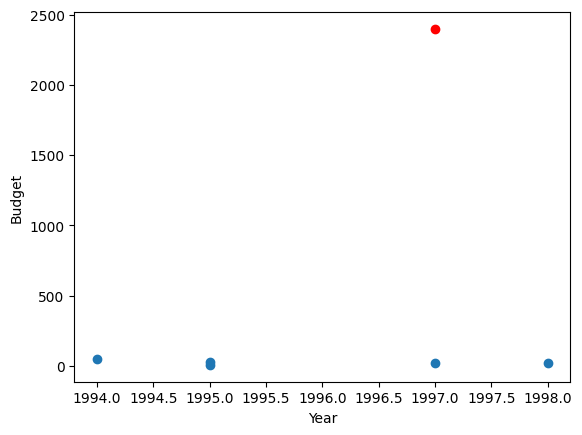

In [9]:
data = [[1997, 20.0], [1994, 45.0], [1998, 20.0], [1995, 6.0], [1995, 30.0]]
plt.scatter([x[0] for x in data], [x[1] for x in data])
outlier = [1997, 2400.0]
plt.scatter([outlier[0]], [outlier[1]], color='red')
plt.xlabel("Year")
plt.ylabel("Budget")
plt.show()


En este caso, el valor `2400.0` parece un valor atípico.
Podemos cuantificar estadísticamente cuanto se aleja de la distribución de los datos (sin contar el dato atípico).

In [55]:
avg = sum([x[1] for x in data]) / len(data)
print(f"Media: {avg}")

Media: 24.2


In [56]:
std = (sum([(x[1] - avg)**2 for x in data]) / len(data))**0.5
print(f"Std: {std}")

Std: 12.905812643921342


In [57]:
diff = (2400.0 - avg) / std
print(f"Desviaciones sobre la media: {diff}")

Desviaciones sobre la media: 184.08759413681756


El valor es claramente atípico al estar a más de 5 desviaciones típicas de la media.

Hagamos lo mismo con nuestro dataset sobre viviendas. Miramos la variable `SalePrice`, que es numérica y no tiene valores faltantes.

In [58]:
df[["SalePrice"]].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


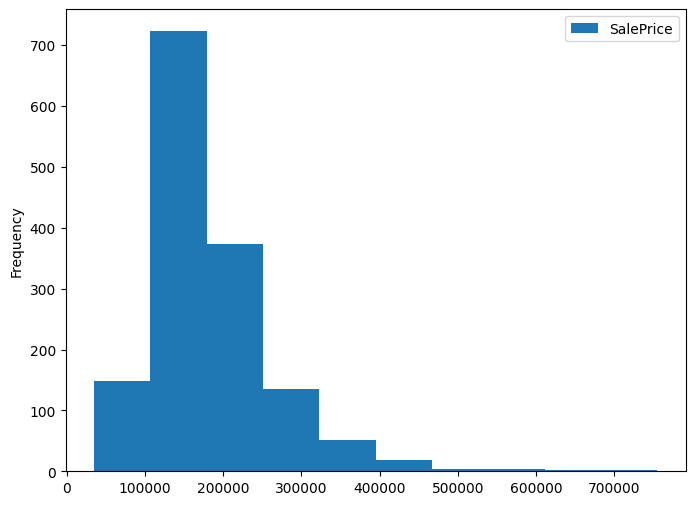

In [59]:
ax = df.plot.hist(column=["SalePrice"], figsize=(8, 6))

En este caso, el valor máximo está más de 7 desviaciones típicas por encima de la media. Sin embargo, tenemos una distribución con una cola bastante larga, con lo que no parece tratarse de un outlier.

# Comprobar hipótesis

Ejemplo: ¿Cuánto son más caras las viviendas con cocinas de calidad>1, con 2 o más plazas de garaje que las que tienen calidad<=1 y 1 plaza de garaje? Comparar medias y cuartiles de ambos casos y representar histogramas de preciso de ventas de ambos grupos. Interpretar resultados.

Las variables que necesitamos para ello son y GarageCars.

In [60]:
df['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64

In [61]:
df.loc[:,['SalePrice']][(df['KitchenAbvGr']>1) & (df['GarageCars']>=2)].describe()

,SalePrice
count,45.000000
mean,133915.555556
std,31752.302862
min,87000.000000
25%,110000.000000
50%,135000.000000
75%,145000.000000
max,206300.000000


In [62]:
df.loc[:,['SalePrice']][(df['KitchenAbvGr']<=1) & (df['GarageCars']==1)].describe()

,SalePrice
count,362.000000
mean,128373.364641
std,30596.789651
min,35311.000000
25%,111250.000000
50%,128100.000000
75%,142093.750000
max,266500.000000


<Axes: xlabel='SalePrice'>

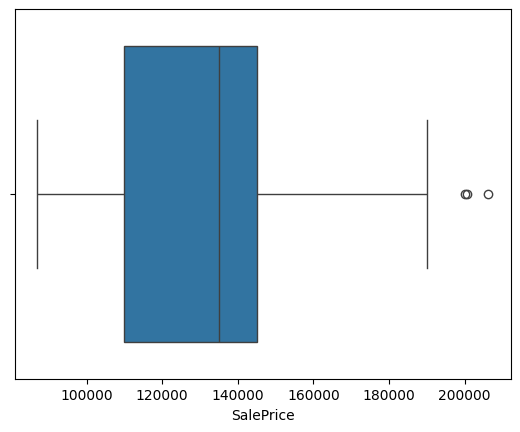

In [63]:
df_1 = df.loc[:,["SalePrice"]][(df["KitchenAbvGr"]>1) & (df["GarageCars"]>=2)].copy()
df_2 = df.loc[:,["SalePrice"]][(df["KitchenAbvGr"]<=1) & (df["GarageCars"]==1)].copy()

sns.boxplot(x=df_1["SalePrice"])

<Axes: xlabel='SalePrice'>

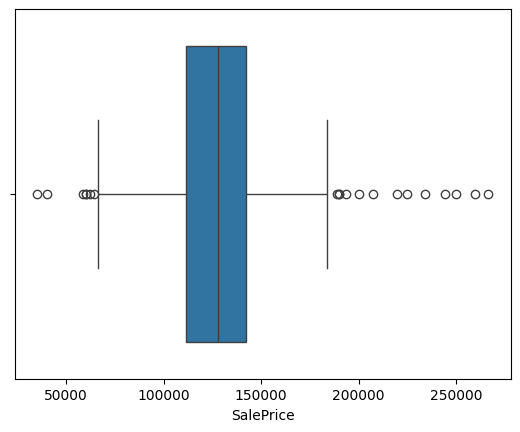

In [64]:
sns.boxplot(x=df_2["SalePrice"])

# Correlación

Podemos calcular la correlación entre las variables numéricas.

In [65]:
df.corr(numeric_only=True)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<Axes: >

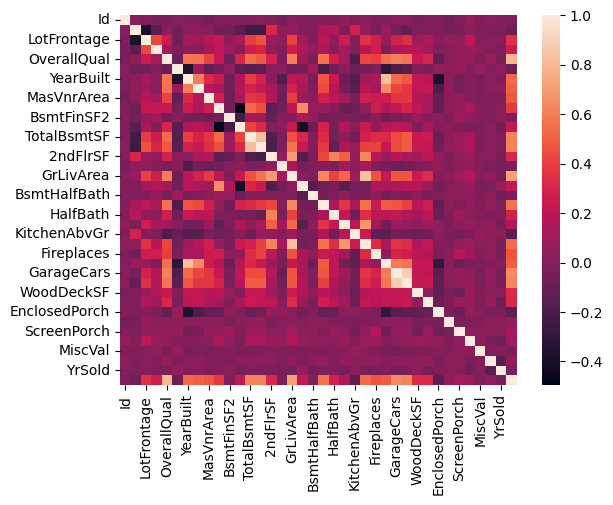

In [66]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr)

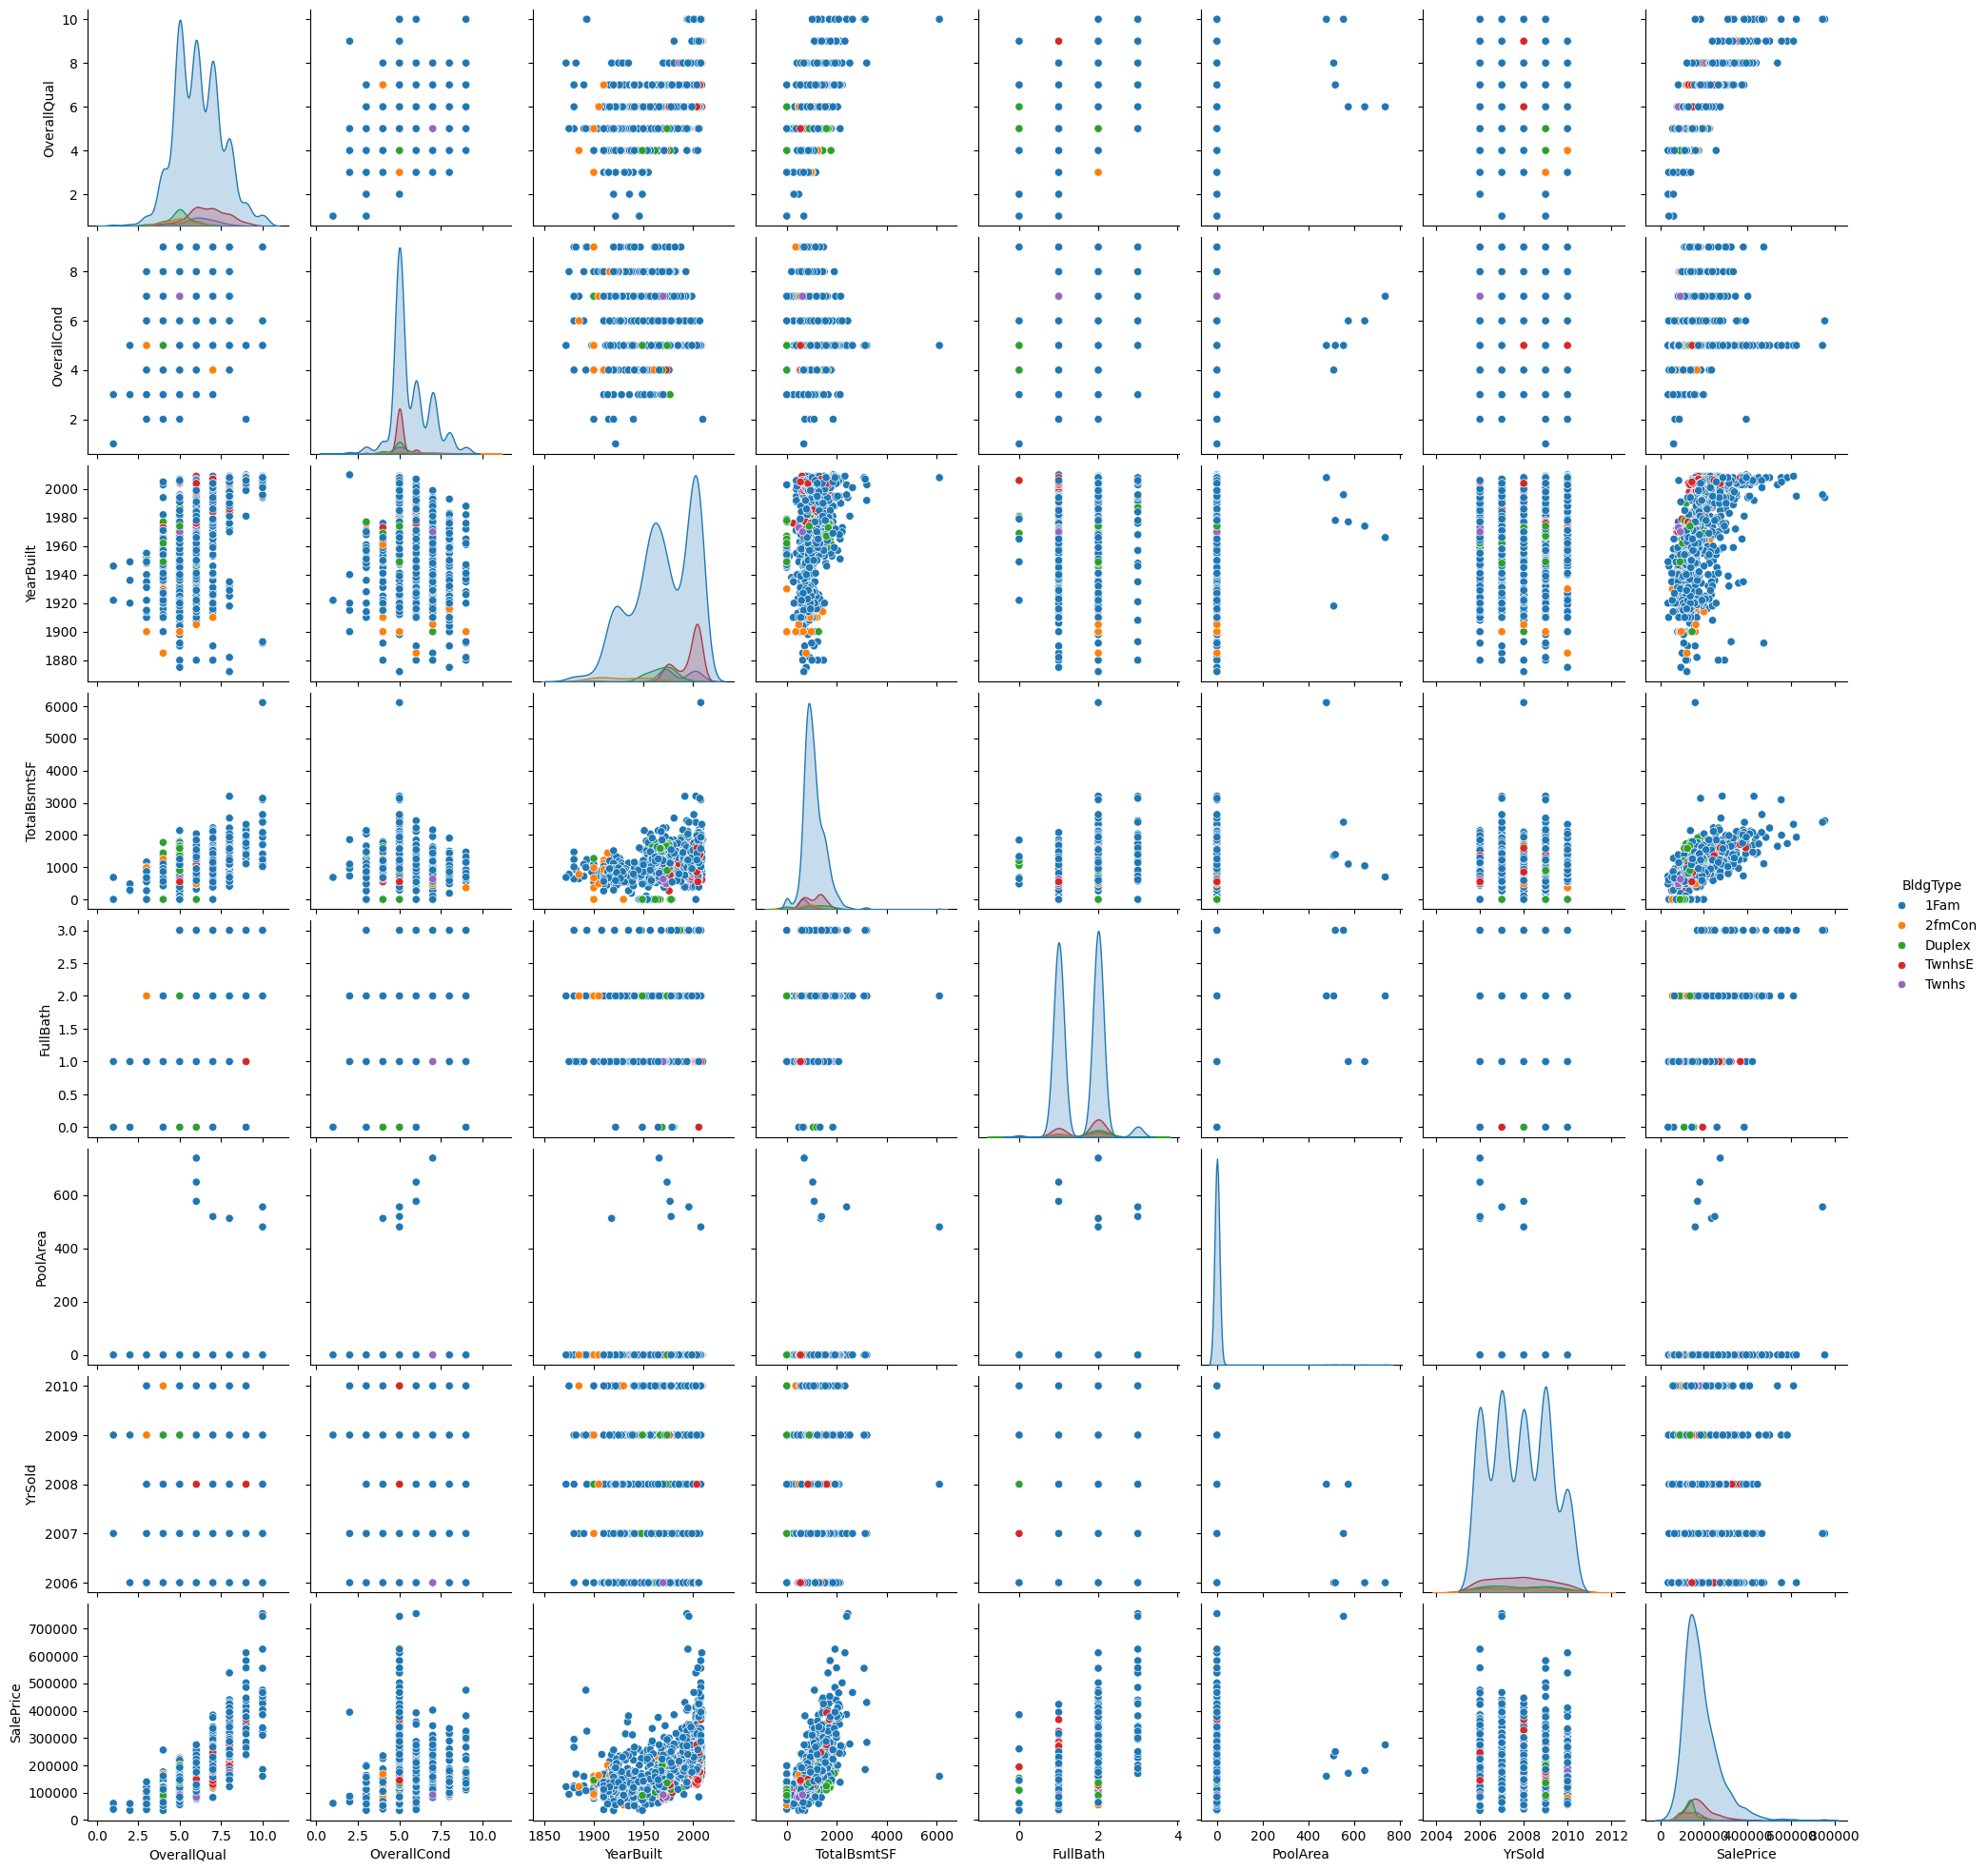

In [67]:
## Visualización de la relación de atributos por tipo de inmueble

my_columns = ['MSZoning', 'Neighborhood', 'BldgType',
       'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'FullBath',
       'PoolArea', 'YrSold', 'SalePrice']


sns.pairplot(df[my_columns], hue="BldgType")

# Normalización

## Normalización

La normalización es un proceso que consiste en **transformar** los datos numéricos para que cumplan ciertas propiedades.

- **Rango**: los valores dentro de un atributo deben estar dentro de un rango determinado.
- **Unidad**: los valores dentro de un atributo deben estar en la misma unidad.
- **Escala**: los valores de **distintos** atributos deben estar en la misma proporción o escala.

## Importancia

Ya hemos visto que varios algoritmos dependen de la distancia entre los datos.
Diferentes escalas o rangos pueden afectar enormemente a la importancia de cada atributo en el modelo.

Text(0.5, 1.0, 'escala 0.02252252252252252:1')

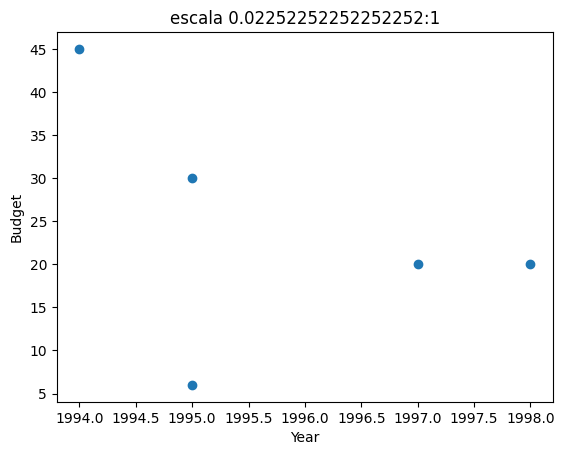

In [68]:
plt.scatter([x[0] for x in data], [x[1] for x in data])
plt.xlabel("Year")
plt.ylabel("Budget")
max_value_0 = max([x[0] for x in data])
max_value_1 = max([x[1] for x in data])
max_value = max(max_value_0, max_value_1)
scale = max_value_1 / max_value_0
plt.title(f"escala {scale}:1")

Text(0.5, 1.0, 'escala 1:1')

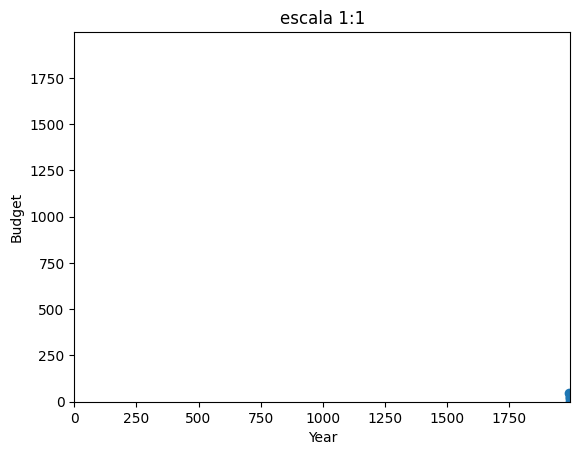

In [69]:
plt.scatter([x[0] for x in data], [x[1] for x in data])
_ = plt.xlim(0, max_value)
_ = plt.ylim(0, max_value)
plt.xlabel("Year")
plt.ylabel("Budget")
plt.title("escala 1:1")

## Técnicas

Existen diversas técnicas de normalización.
Vamos a trabajar con 2 más comunes:

- **Estandarización**: consiste en transformar los datos para que tengan media y desviación típica concreta.
- **Escalado**: consiste en transformar los datos para que estén en un rango determinado.

### Estandarización

La estandarización consiste en transformar los datos para que tengan media y desviación típica concreta.
En general se toma media 0 y desviación típica 1.

Siendo $\mu$ la media del atributo, y $\sigma$ la desviación típica del atributo,
la estandarización que transforma cada dato $x$ es:

$$ x' = \frac{x - \mu}{\sigma} $$


### Escalado

El escalado consiste en transformar los datos para que estén en un rango determinado.
En general se toma el rango `[0,1]`.

Siendo `min` y `max` el mínimo y máximo del atributo,
y `min'` y `max'` el mínimo y máximo del rango,
el escalado que transforma cada dato `x` es:

$$ x' = \frac{x - min}{max - min} * (max' - min') + min' $$



## Ejemplo

In [70]:
avg_year = sum([x[0] for x in data]) / len(data)
std_year = (sum([(x[0] - avg_year)**2 for x in data]) / len(data))**0.5
avg_budget = sum([x[1] for x in data]) / len(data)
std_budget = (sum([(x[1] - avg_budget)**2 for x in data]) / len(data))**0.5
print(f"Media año: {avg_year}, Desviación típica año: {std_year}")
print(f"Media presupuesto: {avg_budget}, Desviación típica presupuesto: {std_budget}")

Media año: 1995.8, Desviación típica año: 1.469693845669907
Media presupuesto: 24.2, Desviación típica presupuesto: 12.905812643921342


In [71]:
data_1 = pd.DataFrame(data, columns=["year", "budget"])
data_1["year (scaled [0,1])"] = (data_1["year"] - data_1["year"].min()) / (data_1["year"].max() - data_1["year"].min())
data_1["budget (standardized)"] = (data_1["budget"] - data_1["budget"].mean()) / data_1["budget"].std()
print(data_1)

   year  budget  year (scaled [0,1])  budget (standardized)
0  1997    20.0                 0.75              -0.291078
1  1994    45.0                 0.00               1.441528
2  1998    20.0                 1.00              -0.291078
3  1995     6.0                 0.25              -1.261337
4  1995    30.0                 0.25               0.401964


# Desagregación

## Desagregación

La desagregación es un proceso que consiste en **transformar** los datos categóricos en atributos **numéricos**.

Esto es importante porque muchos algoritmos de aprendizaje automático solo pueden trabajar con datos numéricos.
*E.g cálculo de distancias*


## Consideraciones

Hay que tener en cuenta varias consideraciones antes de categorizar los datos:

1. **Número de categorías**: el número de categorías debe ser **finito** y **conocido**. Ya que incluir nuevas categorías a posteriori puede ser problemático.
1. **Relación entre categorías**: el hecho de definir un número para cada categoría implica que hay una **relación de orden** entre ellas. Esto **no siempre** tiene por qué ser cierto, y por lo tanto puede llevar a error. *E.g Convertir ciudades en números crea relaciones falsas entre ciudades.*


## Técnicas

Dependiendo de cada tipo de categoría existen distintas técnicas:

- **Etiquetado**: se asigna un número a cada categoría.
- **One-hot encoding**: se crea un atributo por cada categoría, y se asigna un 1 al atributo de la categoría y un 0 al resto.


## Etiquetado

Con esta técnica **se asigna un número a cada categoría**.

Esta técnica es adecuada cuando se cumple una de estas condiciones:

- hay una **relación de orden** entre las categorías.
- es una categoría binaria (solo tiene 2 valores posibles).
- el número de categorías posibles es indeterminado.

| adult | nAdult |
|-------|--------|
| no    | 0      |
| no    | 0      |
| yes   | 1      |
| yes   | 1      |
| no    | 0      |
| no    | 0      |


## One-hot encoding

Esta técnica crea nuevos atributos o **columnas** por cada categoría.
De esta forma, cada nuevo atributo se entenderá como *el dato `x` pertenece a la categoría `y`*.

Esta técnica no genera una relación de orden entre las categorías.
Podemos entender que la diferencia o **distancia** de cada una de las categorías a otra es la misma.

Esta técnica es adecuada cuando:

- no hay una **relación de orden** entre las categorías
- **y** existen más de 2 categorías posibles
- **y** se conoce de antemano el número de categorías.

| theme   | tFamily | tAction | tMystery |
|-|-|-|-|
| Family  | 1 | 0 | 0 |
| Family  | 1 | 0 | 0 |
| Action  | 0 | 1 | 0 |
| Mystery | 0 | 0 | 1 |
| Family  | 1 | 0 | 0 |
| Family  | 1 | 0 | 0 |


# Categorización

## Categorización

Por contra a la desagregación, la categorización es un proceso que consiste en **transformar** los datos numéricos en atributos **categóricos**.
Esto puede ser necesario para ciertos algoritmos que solo puedan trabajar con datos categóricos.

Qué categorías se asignan a los datos numéricos es un proceso **subjetivo** y **dependiente del contexto**.

## Ejemplo

| year | cYear |
|------|-------|
| 1997 | 90s   |
| 1984 | 80s   |
| 1988 | 80s   |
| 2005 | 2000  |
| 2005 | 2000  |


In [73]:
pd.cut(df["SalePrice"], bins=5).value_counts()

SalePrice
(34179.9, 178920.0]     871
(178920.0, 322940.0]    508
(322940.0, 466960.0]     70
(466960.0, 610980.0]      7
(610980.0, 755000.0]      4
Name: count, dtype: int64

# Conclusiones

## Conclusiones

- Una parte fundamental del proceso de **aprendizaje automático** es el **dataset**.
- Los datos deben ser **preprocesados** para poder ser usados en algoritmos de aprendizaje automático.
- El preprocesamiento debe ser **explícito**, **justificado** y **documentado**.
- Técnicas de preprocesamiento:
  - **Corrección de valores erróneos**: eliminar, corregir o imputar.
  - **Corrección de valores atípicos**: detectar, eliminar, corregir o imputar.
  - **Normalización**: estandarización o escalado.
  - **Desagregación**: etiquetado o one-hot encoding.
  - **Categorización**: elegir categorías.

<img src="./images/eda.jpeg" width="90%" style="display: block; margin: auto;" />
